In [ ]:
system('sudo apt-get install r-cran-igraph', intern=TRUE)

system('sudo apt-get install r-cran-clevr', intern=TRUE)

Warning message in system("sudo apt-get install r-cran-igraph", intern = TRUE):
“running command 'sudo apt-get install r-cran-igraph' had status 100”


[1] "Reading package lists..."                                                                                           
 [2] "Building dependency tree..."                                                                                        
 [3] "Reading state information..."                                                                                       
 [4] "The following NEW packages will be installed:"                                                                      
 [5] "  r-cran-igraph"                                                                                                    
 [6] "0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded."                                                    
 [7] "Need to get 4,232 kB of archives."                                                                                  
 [8] "After this operation, 7,693 kB of additional disk space will be used."                                              
 [9] "Err:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 r-cran-igraph amd64 1.4.2-1cran1.2004.0"
[10] "  404  Not Found [IP: 185.125.190.52 80]"                                                                           
attr(,"status")
[1] 100
attr(,"errmsg")
[1] "Resource temporarily unavailable"

Warning message in system("sudo apt-get install r-cran-clevr", intern = TRUE):
“running command 'sudo apt-get install r-cran-clevr' had status 100”


[1] "Reading package lists..."     "Building dependency tree..." 
[3] "Reading state information..."
attr(,"status")
[1] 100
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [ ]:
system('sudo apt-get install r-cran-matrixStats', intern=TRUE)

Warning message in system("sudo apt-get install r-cran-matrixStats", intern = TRUE):
“running command 'sudo apt-get install r-cran-matrixStats' had status 100”


[1] "Reading package lists..."     "Building dependency tree..." 
[3] "Reading state information..."
attr(,"status")
[1] 100
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [ ]:
# Load required libraries
install.packages("matrixStats")

library("matrixStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




ERROR: ignored

In [ ]:
unzip('finance_data.zip')

In [ ]:
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))
    }
}
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

In [ ]:
dim(m)

[1] 494 765

In [ ]:

cal_cor <- function(comp_data) {

  num_stocks<- 494
  num_days = 765

  res <- matrix(0, nrow = num_stocks, ncol = num_days)

  for (i in 1:num_stocks) {
    for (j in 2:num_days) {
      res[i, j] <- log(1 + (comp_data[i, j] - comp_data[i, j - 1]) / comp_data[i, j - 1])
    }
  }


  ret <- matrix(0, nrow = 494, ncol = 494)

  for (i in 1:494) {
      for (j in 1:494) {
        if (i != j) {

          ret[i, j] <- mean(res[i, ] * res[j, ]) - mean(res[i, ]) * mean(res[j, ]) / sqrt(var(res[i, ]) - mean(res[i, ])^2) * sqrt(var(res[j, ]) - mean(res[j, ])^2)
        }
      }
  }


  return(ret)


}

daily

In [ ]:
load("distance.RData")
# returns <- cal_cor(m)



# d <- sqrt(2-2*returns)

# Convert the matrix to a square matrix
n <- sqrt(length(fname))
retrieved_d <- matrix(fname, nrow = n, ncol = n, byrow = TRUE)


g<-graph_from_adjacency_matrix(retrieved_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)



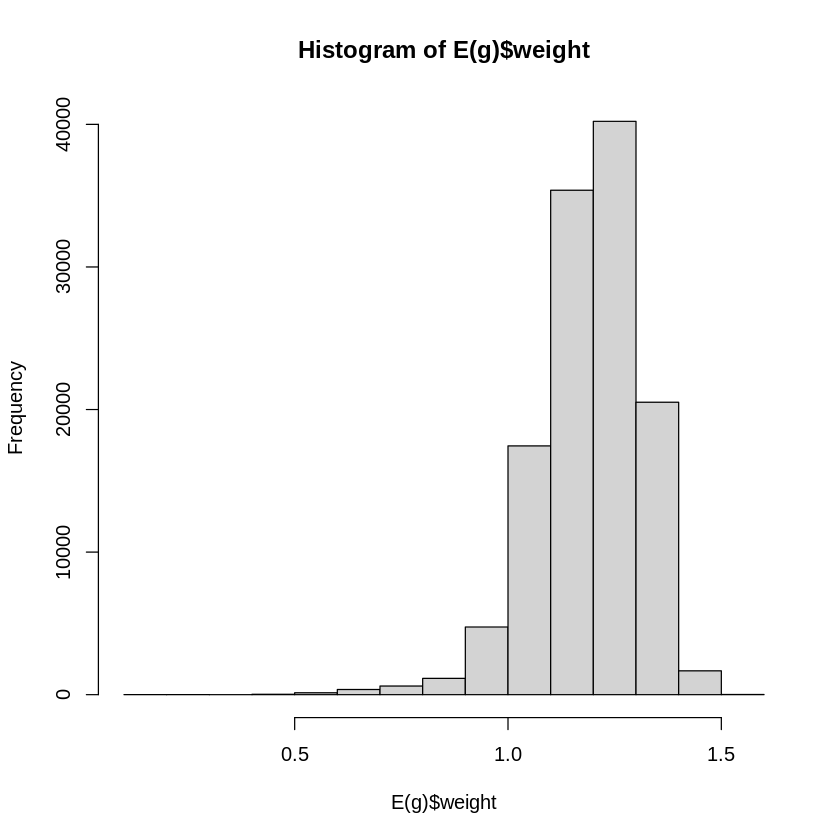

In [ ]:
hist(E(g)$weight)


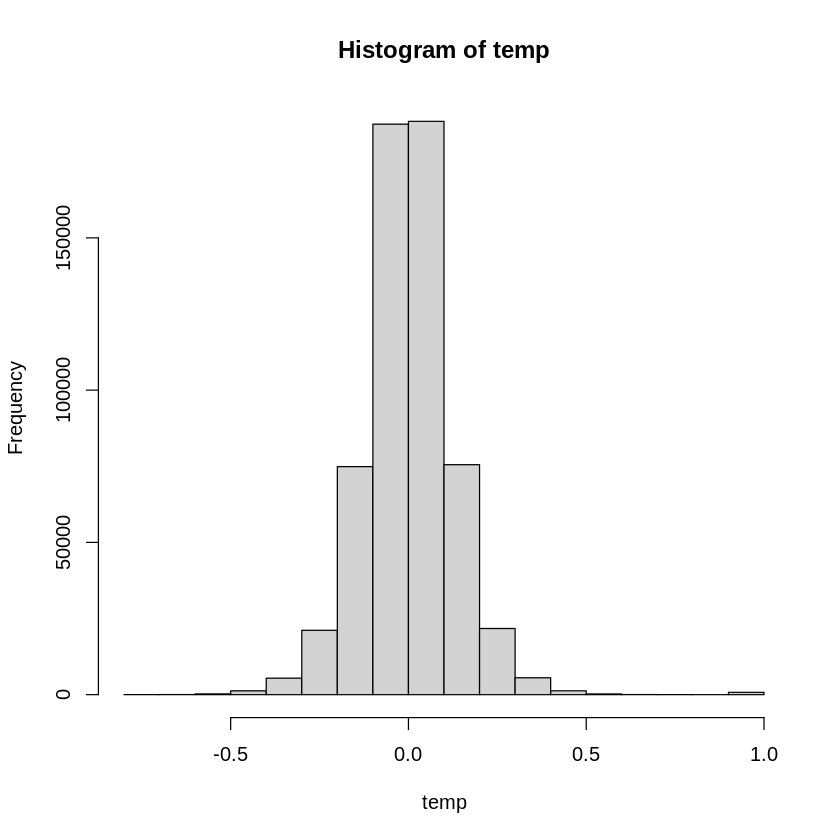

In [ ]:
hist(temp)

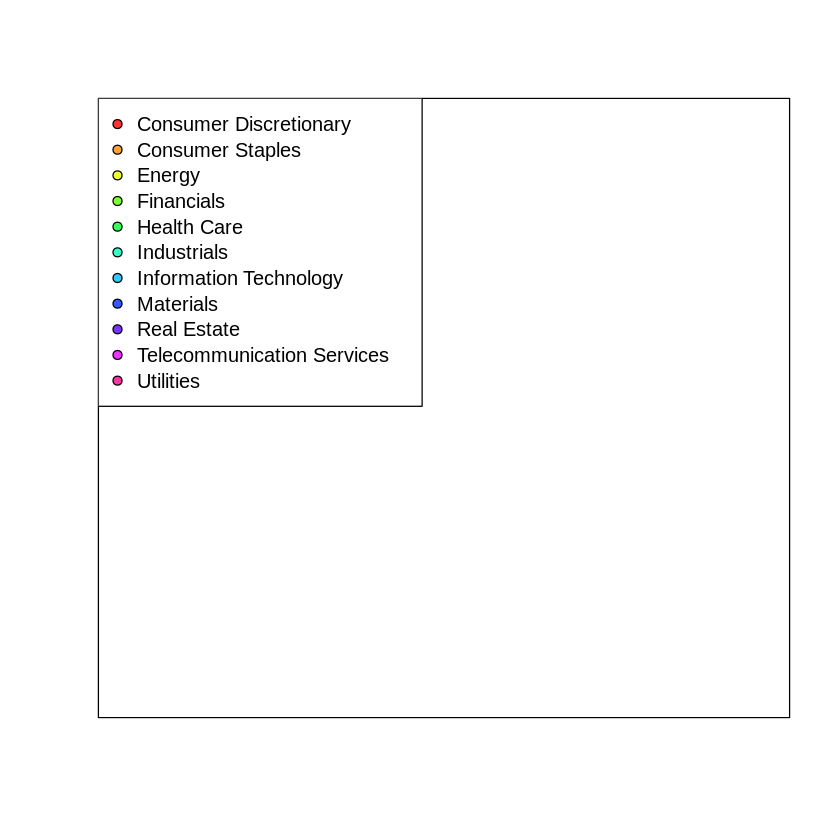

In [ ]:
mst_g <- minimum.spanning.tree(g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
plot(NA, xlim = c(0, 1), ylim = c(0, 1), type = 'n', xlab = '', ylab = '', xaxt = 'n', yaxt = 'n')
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 35

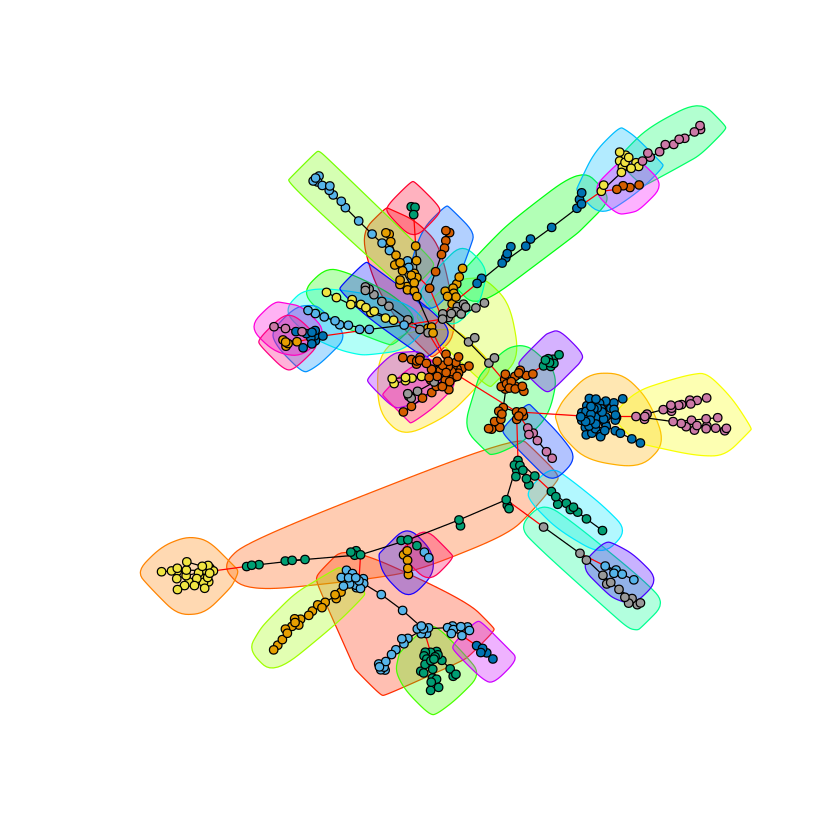

In [ ]:
#cluster
wc_daily <- walktrap.community(mst_g)
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)


In [ ]:
length(sectors.index)

[1] 494

In [ ]:
length(wc_daily$membership)

[1] 494

In [ ]:
#get metrics

library(clevr)


true<- c(sectors.index)



pred <- c(wc_daily$membership)




homogeneity(true, pred)
completeness(true,pred)

[1] 0.6988008

[1] 0.4797709

In [ ]:
Si <- c()
for(i in c(1:num_sector)){
  Si[i] <- sum(sectors.index == i)
}
Si

[1] 84 36 34 63 60 64 66 24 31  4 28

In [ ]:
Si <- c()
for(i in c(1:num_sector)){
  Si[i] <- sum(sectors.index == i)
}
Si

# find alpha for
p_method_1 = c()
p_method_2 = c()


for(v in c(1:vcount(mst_g))){


    current_sector = sectors.index[v]

    N_i <- neighbors(mst_g, v)

    Q_i <- intersect(N_i, which(sectors.index == current_sector))

    p_method_1[v] <- length(Q_i) / length(N_i)
    p_method_2[v] <- Si[current_sector] / vcount(mst_g)
}


alpha_1 <- sum(p_method_1) / vcount(mst_g)
print(sprintf("Alpha value for method 1 is: %s", alpha_1))

alpha_2 <- sum(p_method_2) / vcount(mst_g)
print(sprintf("Alpha value for method 2 is: %s", alpha_2))

[1] 84 36 34 63 60 64 66 24 31  4 28

[1] "Alpha value for method 1 is: 0.824671864347978"
[1] "Alpha value for method 2 is: 0.114188070612533"


weekly

In [ ]:
cal_cor1 <- function(comp_data) {

  num_stocks <- nrow(comp_data)
  num_days = ncol(comp_data)

  res <- matrix(0, nrow = num_stocks, ncol = num_days)

  for (i in 1:num_stocks) {
    for (t in 2:num_days) {
      if (!is.na(comp_data[i, t]) && !is.na(comp_data[i, t - 1])) {

        print(comp_data[i, t])
        print(comp_data[i, t-1])
        print(comp_data[i, t+1])
        res[i, j] <- log(1 + (comp_data[i, j] - comp_data[i, j - 1]) / comp_data[i, j - 1])
      }
    }
  }


  ret <- matrix(0, nrow = num_stocks, ncol = num_stocks)

  for (i in 1:num_stocks) {
      for (j in 1:num_stocks) {
        if (i != j) {


          ret[i, j] <- mean(returns[i, ] * returns[j, ]) - mean(returns[i, ]) * mean(returns[j, ]) / sqrt(var(returns[i, ]) - mean(returns[i, ])^2) * sqrt(var(returns[j, ]) - mean(returns[j, ])^2)
        }
      }
  }


  return(ret)


}

In [ ]:
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")

m <- matrix(, nrow = 0, ncol = 143)

sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()


for (i in 1: length(file.names))
{
  file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
  Date_data<- file$Date
weekdays_data <-weekdays(as.Date(Date_data)) #this gives weekday name

weekly_m_m <- file[weekdays_data == "Monday", ]

if(length(weekly_m_m$Close)==143){
        m <- rbind(m, matrix(weekly_m_m$Close, nrow=1, ncol=143))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))


}


}

com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)


sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         35 
                    Energy                 Financials 
                        34                         62 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

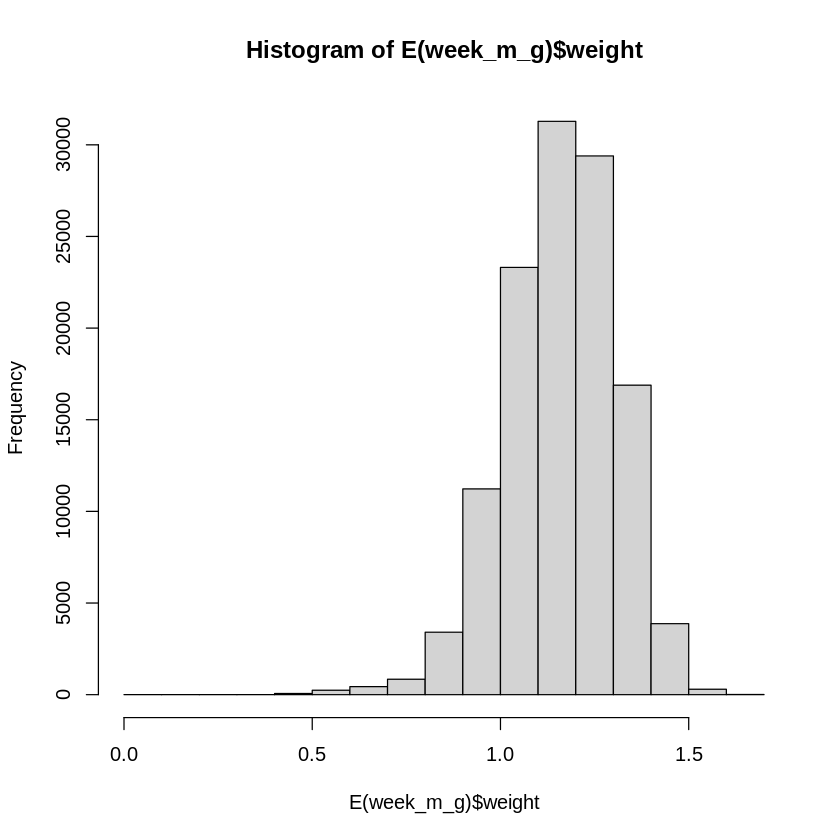

In [ ]:
load("distance_weekly.RData")






# Convert the matrix to a square matrix
n <- sqrt(length(fname))
retrieved_week_m_d <- matrix(fname, nrow = n, ncol = n, byrow = TRUE)




week_m_g<-graph_from_adjacency_matrix(retrieved_week_m_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(week_m_g)$weight)


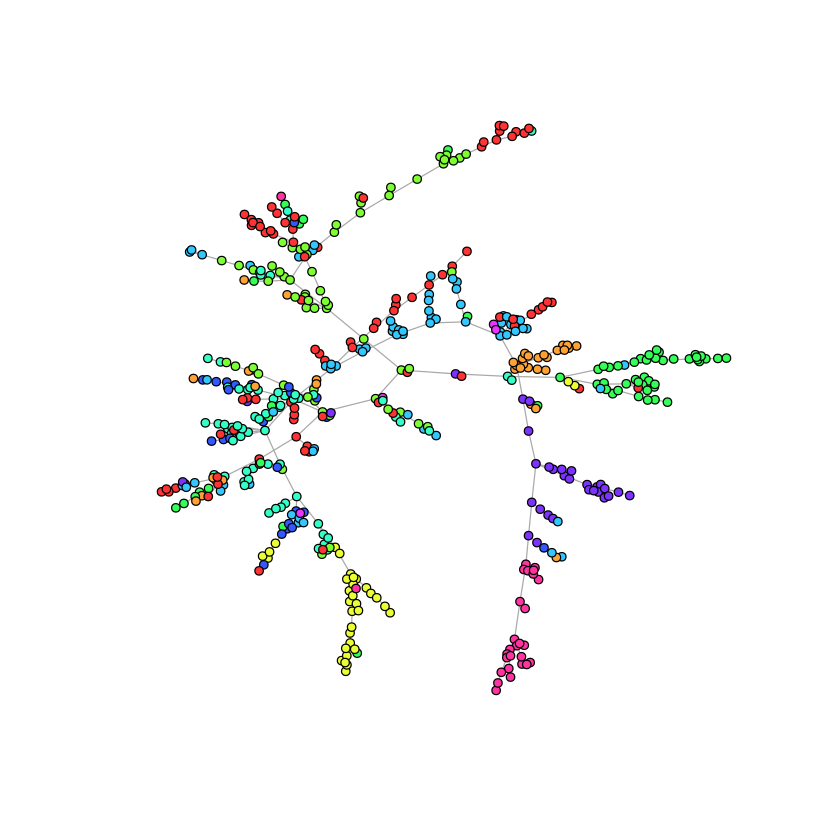

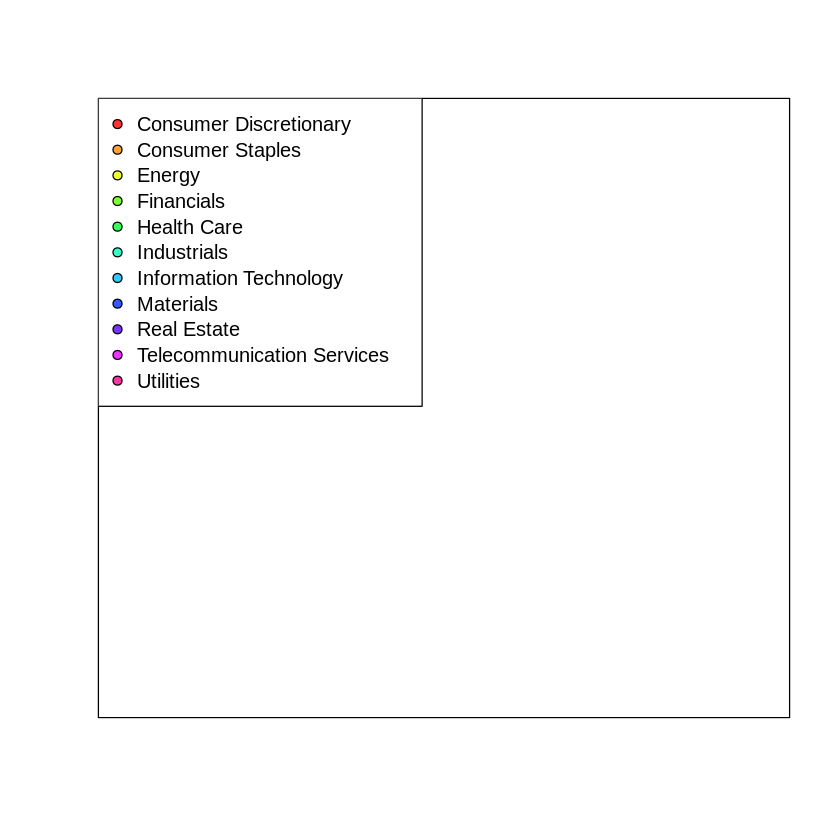

In [ ]:
mst_week_m <- mst(week_m_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
plot(NA, xlim = c(0, 1), ylim = c(0, 1), type = 'n', xlab = '', ylab = '', xaxt = 'n', yaxt = 'n')
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)


[1] 45

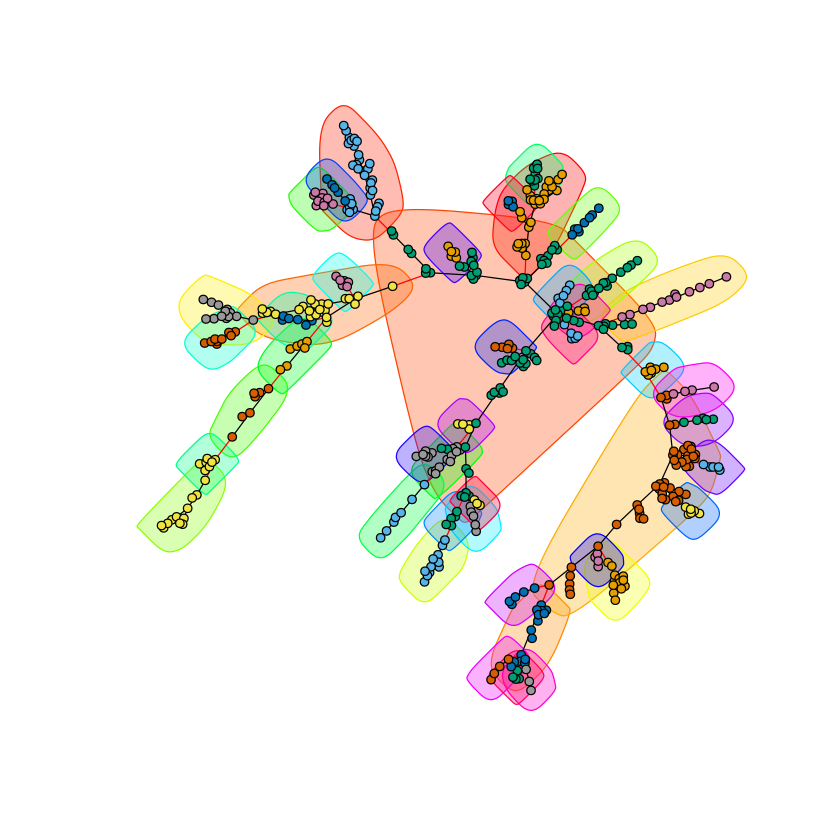

In [ ]:
#cluster
wc_weekly <- walktrap.community(mst_week_m)
length(wc_weekly)
plot(wc_weekly, mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)


In [ ]:
#get metrics
true<- c(sectors.index)
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.5931061

[1] 0.3952978

In [ ]:
Si <- c()
for(i in c(1:num_sector)){
  Si[i] <- sum(sectors.index == i)
}
Si

# find alpha for
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_week_m))){

    #N_i is the number of neighbors of v

    current_sector = sectors.index[v]

    N_i <- neighbors(mst_week_m, v)

    #Q_i is the number of neighbors of v which belong to the same sector as v

    Q_i <- intersect(N_i, which(sectors.index == current_sector))

  p_method_1[v] <- length(Q_i) / length(N_i)
  p_method_2[v] <- Si[current_sector] / vcount(mst_week_m)
}

alpha_1 <- sum(p_method_1) / vcount(mst_week_m)
print(sprintf("Alpha value for method 1 is: %s", alpha_1))

alpha_2 <- sum(p_method_2) / vcount(mst_week_m)
print(sprintf("Alpha value for method 2 is: %s", alpha_2))

[1] 84 35 34 62 60 64 66 24 31  4 28

[1] "Alpha value for method 1 is: 0.744384573195549"
[1] "Alpha value for method 2 is: 0.114308612598321"


Monthly

In [ ]:

path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")

m <- matrix(, nrow = 0, ncol = 25)

sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()


for (i in 1: length(file.names))
{
  file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
  Date_data<- file$Date
dates <- as.Date(Date_data, format = "%Y-%m-%d")

dates_num <- as.numeric(format(dates, "%d"))



monthly_15_m <- file[dates_num == 15, ]


if(length(monthly_15_m$Close)==25){
        m <- rbind(m, matrix(monthly_15_m$Close, nrow=1, ncol=25))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))


}


}

com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)




sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         35 
                    Energy                 Financials 
                        34                         62 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

In [ ]:
cal_cor2 <- function(comp_data) {

  num_stocks <- nrow(comp_data)
  num_days = ncol(comp_data)

  res <- matrix(0, nrow = num_stocks, ncol = num_days)

  for (i in 1:num_stocks) {
    for (t in 2:num_days) {
      if (!is.na(comp_data[i, t]) && !is.na(comp_data[i, t - 1])) {

      res[i, t] <- log(1 + (comp_data[i, t] - comp_data[i, t - 1]) / comp_data[i, t - 1])
      }
    }
  }


  ret <- matrix(0, nrow = num_stocks, ncol = num_stocks)

  for (i in 1:num_stocks) {
      for (j in 1:num_stocks) {
        if (i != j) {


          ret[i, j] <- mean(returns[i, ] * returns[j, ]) - mean(returns[i, ]) * mean(returns[j, ]) / sqrt(var(returns[i, ]) - mean(returns[i, ])^2) * sqrt(var(returns[j, ]) - mean(returns[j, ])^2)
        }
      }
  }


  return(ret)


}

In [ ]:
month_m_cor <- cal_cor1(m)

[1] 56.66
[1] 54.49
[1] 57.58
[1] 57.58
[1] 56.66
[1] 57.92
[1] 57.92
[1] 57.58
[1] 51.79
[1] 51.79
[1] 57.92
[1] 38.68
[1] 38.68
[1] 51.79
[1] 38.01
[1] 38.01
[1] 38.68
[1] 43.38
[1] 43.38
[1] 38.01
[1] 42.04
[1] 42.04
[1] 43.38
[1] 39.52
[1] 39.52
[1] 42.04
[1] 40.13
[1] 40.13
[1] 39.52
[1] 36.15
[1] 36.15
[1] 40.13
[1] 35.58
[1] 35.58
[1] 36.15
[1] 40.81
[1] 40.81
[1] 35.58
[1] 37.11
[1] 37.11
[1] 40.81
[1] 38.29
[1] 38.29
[1] 37.11
[1] 40.91
[1] 40.91
[1] 38.29
[1] 44.94
[1] 44.94
[1] 40.91
[1] 46.67
[1] 46.67
[1] 44.94
[1] 48.44
[1] 48.44
[1] 46.67
[1] 45.44
[1] 45.44
[1] 48.44
[1] 45.4
[1] 45.4
[1] 45.44
[1] 46.56
[1] 46.56
[1] 45.4
[1] 51.62
[1] 51.62
[1] 46.56
[1] 54.1
[1] 54.1
[1] 51.62


ERROR: ignored

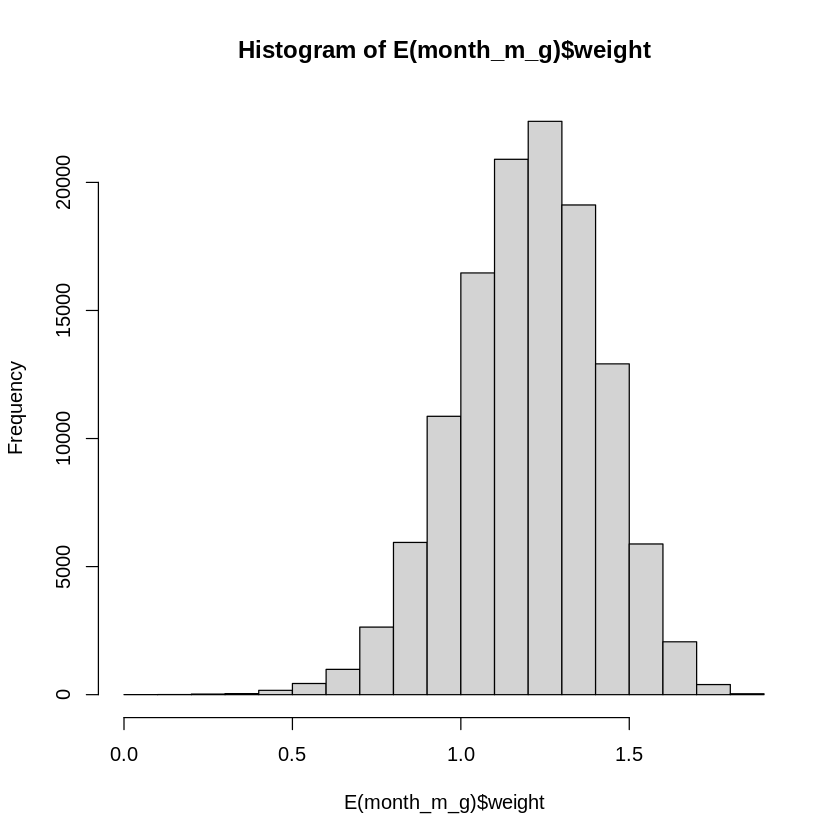

In [ ]:

load("distance_monthly.RData")






# Convert the matrix to a square matrix
n <- sqrt(length(fname))
retrieved_month_m_d <- matrix(fname, nrow = n, ncol = n, byrow = TRUE)



month_m_g<-graph_from_adjacency_matrix(retrieved_month_m_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(month_m_g)$weight)

In [ ]:
dates_num <- #format(#write code here)
monthly_15_m <- #select data where date is 15
monthly_15_cor <- cal_cor(monthly_15_m )
monthly_15_d <- #check formula from question pdf
month_15_g<-graph_from_adjacency_matrix(monthly_15_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(month_15_g)$weight)


ERROR: ignored

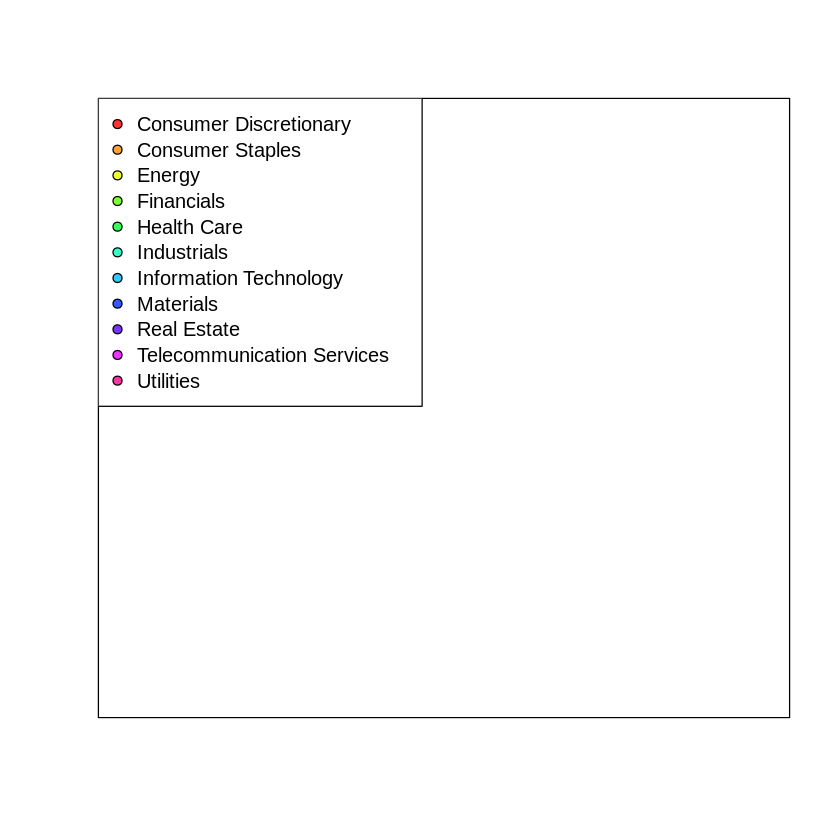

In [ ]:
mst_month_15 <- mst(month_m_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
plot(NA, xlim = c(0, 1), ylim = c(0, 1), type = 'n', xlab = '', ylab = '', xaxt = 'n', yaxt = 'n')
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 30

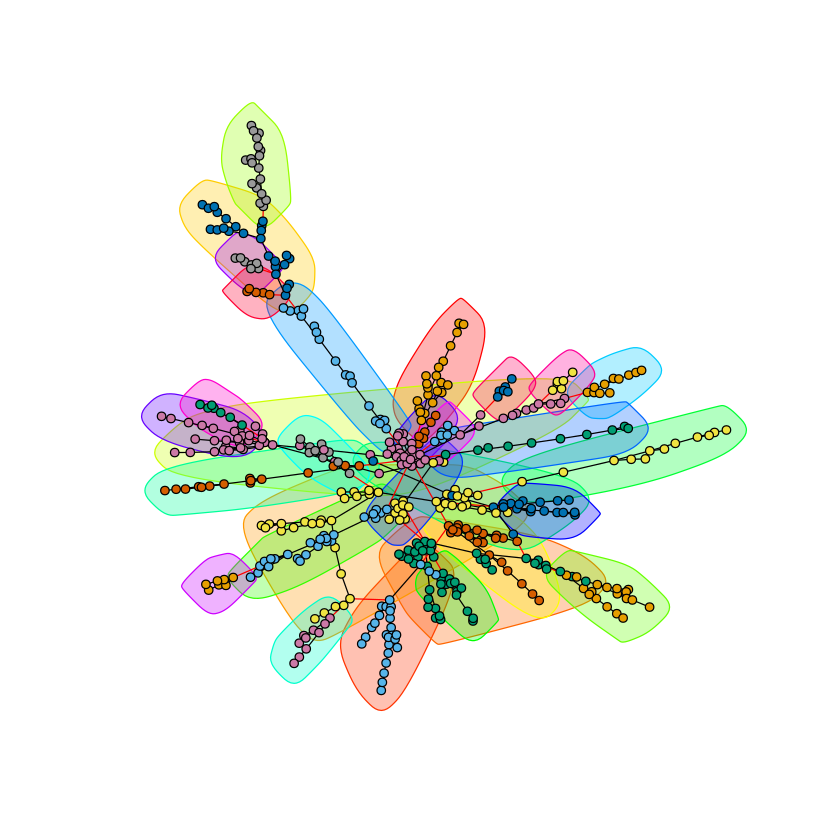

In [ ]:
#cluster
wc_monthly <- walktrap.community(mst_month_15)
length(wc_monthly)
plot(wc_monthly, mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)


In [ ]:
#get metrics
true<- c(sectors.index)
pred <- c(wc_monthly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.3606213

[1] 0.2571636

In [ ]:
Si <- c()
for(i in c(1:num_sector)){
  Si[i] <- sum(sectors.index == i)
}
Si

# find alpha for
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_month_15))){

    #N_i is the number of neighbors of v

    current_sector = sectors.index[v]

    N_i <- neighbors(mst_month_15, v)

    #Q_i is the number of neighbors of v which belong to the same sector as v

    Q_i <- intersect(Ni, which(sectors.index == current_sector))

  p_method_1[v] <- length(Q_i) / length(N_i)
  p_method_2[v] <- Si[current_sector] / vcount(mst_month_15)
}

alpha_1 <- sum(p_method_1) / vcount(mst_month_15)
print(sprintf("Alpha value for method 1 is: %s", alpha_1))

alpha_2 <- sum(p_method_2) / vcount(mst_month_15)
print(sprintf("Alpha value for method 2 is: %s", alpha_2))

[1] 84 35 34 62 60 64 66 24 31  4 28

[1] "Alpha value for method 1 is: 0.455305754543559"
[1] "Alpha value for method 2 is: 0.114308612598321"


predict sector or unkown stock

### daily

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

[1] 84 36 34 63 60 64 66 24 31  4 28

In [ ]:
# find alpha for
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_g))){

    #N_i is the number of neighbors of v

    Ni <- neighbors(mst_g, v)

    #Q_i is the number of neighbors of v which belong to the same sector as v

    current_sector = sectors.index[v]


    p_method_1[v] = #check pdf
    p_method_2[v] = #check pdf
}
alpha_1 = #check pdf. you can use the 'sum' function
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 =  #check pdf. you can use the 'sum' function
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

In [ ]:
#repeat for weekly

In [ ]:
#repeat for monthly